In [45]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [46]:
BCM_F = pd.read_csv('/home/basalam1960/PycharmProjects/MST/BCM-R-F.csv')
BCM_R = pd.read_csv('/home/basalam1960/PycharmProjects/MST/BCM-R-R.csv')
BCM_Iran = pd.read_csv('/home/basalam1960/PycharmProjects/MST/BCM-R-Iran.csv')

In [47]:
corrMatrixF = BCM_F.corr()
corrMatrixR = BCM_R.corr()

<AxesSubplot:>

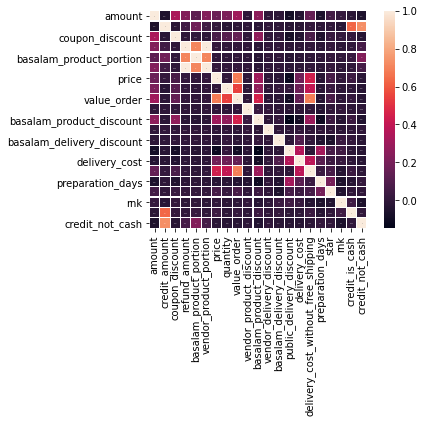

In [48]:
sn.heatmap(corrMatrixF, vmin=corrMatrixF.values.min(), vmax=1, square=True, 
        linewidths=0.1, annot=True, annot_kws={"size":1})

<AxesSubplot:>

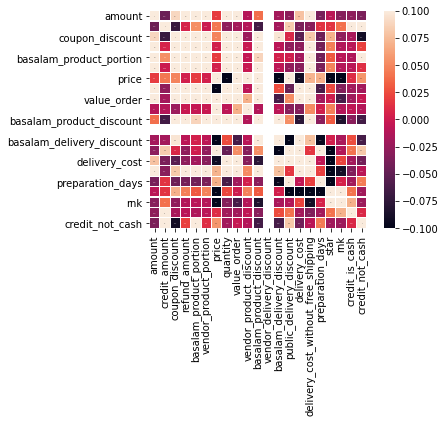

In [50]:
sn.heatmap(corrMatrixR, vmin=corrMatrixR.values.min(), vmax=1, square=True, 
        linewidths=0.1, annot=True, annot_kws={"size":1})

In [51]:
corrMatrixFComp = BCM_F.corr()
corr_pairs = corrMatrixFComp.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
negative_pairs = sorted_pairs[sorted_pairs < 0.3]
#strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
print(negative_pairs)

public_delivery_discount             basalam_product_discount              -0.145975
basalam_product_discount             public_delivery_discount              -0.145975
price                                public_delivery_discount              -0.111078
public_delivery_discount             price                                 -0.111078
preparation_days                     basalam_product_discount              -0.101124
                                                                              ...   
coupon_discount                      basalam_product_discount               0.267117
quantity                             basalam_product_discount               0.268916
basalam_product_discount             quantity                               0.268916
delivery_cost_without_free_shipping  basalam_product_discount               0.296430
basalam_product_discount             delivery_cost_without_free_shipping    0.296430
Length: 386, dtype: float64


In [53]:
corrMatrixFComp = BCM_R.corr()
corr_pairs = corrMatrixFComp.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
negative_pairs = sorted_pairs[sorted_pairs < 0.3]
#strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
print(negative_pairs)

preparation_days          star                      -0.199044
star                      preparation_days          -0.199044
                          delivery_cost             -0.198637
delivery_cost             star                      -0.198637
public_delivery_discount  star                      -0.175512
                                                       ...   
vendor_product_portion    amount                     0.220394
amount                    value_order                0.225478
value_order               amount                     0.225478
vendor_product_discount   price                      0.233383
price                     vendor_product_discount    0.233383
Length: 336, dtype: float64


In [54]:
#hypothesis test for mean
avgBCM_F = BCM_F.mean()

avgBCM_R = BCM_R.mean()

avgBCM_Iran = BCM_Iran.mean()
varBCM_Iran = np.var(BCM_Iran)
sdBCM_Iran = np.square(varBCM_Iran)

In [59]:
scaled_BCM_F = np.zeros(21)

In [60]:
for i in range(avgBCM_F.shape[0]):
    if avgBCM_F[i]>avgBCM_Iran[i] and avgBCM_F[i]<avgBCM_Iran[i]+sdBCM_Iran[i]:
        scaled_BCM_F[i] = 1
    elif avgBCM_F[i]>avgBCM_Iran[i]+sdBCM_Iran[i] and avgBCM_F[i]<avgBCM_Iran[i]+2*sdBCM_Iran[i]:
        scaled_BCM_F[i] = 2
    elif avgBCM_F[i]>avgBCM_Iran[i]+2*sdBCM_Iran[i]:
        scaled_BCM_F[i] = 3
    elif avgBCM_F[i]<avgBCM_Iran[i] and avgBCM_F[i]>avgBCM_Iran[i]-sdBCM_Iran[i]:
        scaled_BCM_F[i] = -1
    elif avgBCM_F[i]<avgBCM_Iran[i]-sdBCM_Iran[i] and avgBCM_F[i]>avgBCM_Iran[i]-2*sdBCM_Iran[i]:
        scaled_BCM_F[i] = -2
    elif avgBCM_F[i]<avgBCM_Iran[i]-2*sdBCM_Iran[i]:
        scaled_BCM_F[i] = -3

In [61]:
scaled_BCM_F

array([ 1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,
        1., -1.,  1.,  1.,  2., -1., -1.,  1.])

In [62]:
scaled_BCM_R = np.zeros(21)

In [58]:
for i in range(avgBCM_R.shape[0]):
    if avgBCM_R[i]>avgBCM_Iran[i] and avgBCM_R[i]<avgBCM_Iran[i]+sdBCM_Iran[i]:
        scaled_BCM_R[i] = 1
    elif avgBCM_R[i]>avgBCM_Iran[i]+sdBCM_Iran[i] and avgBCM_R[i]<avgBCM_Iran[i]+2*sdBCM_Iran[i]:
        scaled_BCM_R[i] = 2
    elif avgBCM_R[i]>avgBCM_Iran[i]+2*sdBCM_Iran[i]:
        scaled_BCM_R[i] = 3
    elif avgBCM_R[i]<avgBCM_Iran[i] and avgBCM_R[i]>avgBCM_Iran[i]-sdBCM_Iran[i]:
        scaled_BCM_R[i] = -1
    elif avgBCM_R[i]<avgBCM_Iran[i]-sdBCM_Iran[i] and avgBCM_R[i]>avgBCM_Iran[i]-2*sdBCM_Iran[i]:
        scaled_BCM_R[i] = -2
    elif avgBCM_R[i]<avgBCM_Iran[i]-2*sdBCM_Iran[i]:
        scaled_BCM_R[i] = -3

In [34]:
scaled_BCM_R

array([-1., -1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,
        1., -1., -1., -1., -1.,  1.,  1., -1.])

In [126]:
"""
# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
corrMatrixF = 20 * randn(1000) + 100
corrMatrixR = corrMatrixF + (10 * randn(1000) + 50)
# calculate Pearson's correlation
corr, _ = pearsonr(corrMatrixF, corrMatrixR)
print('Pearsons correlation: %.3f' % corr)
"""

"\n# calculate the Pearson's correlation between two variables\nfrom numpy.random import randn\nfrom numpy.random import seed\nfrom scipy.stats import pearsonr\n# seed random number generator\nseed(1)\n# prepare data\ncorrMatrixF = 20 * randn(1000) + 100\ncorrMatrixR = corrMatrixF + (10 * randn(1000) + 50)\n# calculate Pearson's correlation\ncorr, _ = pearsonr(corrMatrixF, corrMatrixR)\nprint('Pearsons correlation: %.3f' % corr)\n"

In [127]:
"""
# calculate the spearmans's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr
# seed random number generator
seed(1)
# prepare data
corrMatrixF = 20 * randn(1000) + 100
corrMatrixR = corrMatrixF + (10 * randn(1000) + 50)
# calculate spearman's correlation
corr, _ = spearmanr(corrMatrixF, corrMatrixR)
print('Spearmans correlation: %.3f' % corr)
"""

"\n# calculate the spearmans's correlation between two variables\nfrom numpy.random import randn\nfrom numpy.random import seed\nfrom scipy.stats import spearmanr\n# seed random number generator\nseed(1)\n# prepare data\ncorrMatrixF = 20 * randn(1000) + 100\ncorrMatrixR = corrMatrixF + (10 * randn(1000) + 50)\n# calculate spearman's correlation\ncorr, _ = spearmanr(corrMatrixF, corrMatrixR)\nprint('Spearmans correlation: %.3f' % corr)\n"